## 1. Описание данных

In [294]:
%matplotlib inline
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (9, 6)}) #надстройка для большого графика


import warnings
warnings.filterwarnings('ignore')

In [295]:
data = pd.read_csv("telecom_users.csv") #чтение данных
y = data['Churn']
X = data.drop(['Churn', 'Unnamed: 0'], axis=1) 

title_mapping = {"No": 0, "Yes": 1} #мэппинг зависимой переменной
y = y.map(title_mapping).astype(int)

In [296]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5


In [297]:
X.isnull().sum() #проверка пустых значений датасета

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [298]:
X.dtypes # типы фичей

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [299]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], downcast='float', errors='coerce') #конвертация общей суммы в целый тип
X.isnull().sum() # Проверка ошибки конвертации - 10 значений 
Total_charges_median = X.query('TotalCharges >= 0')['TotalCharges'].median() # медианное значение для замены ошибочных значений
X['TotalCharges'].fillna(Total_charges_median, inplace=True)


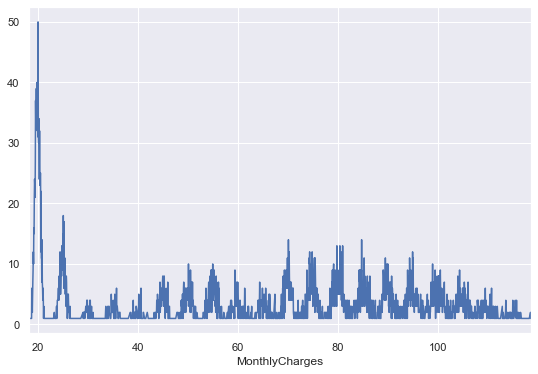

In [300]:
X.groupby('MonthlyCharges')['customerID'].nunique().plot() #Распределение месячного размера оплаты по пользователям

In [301]:
X.loc[ : , ['tenure', 'MonthlyCharges', 'TotalCharges']].describe() #основные статистики для числовых фичей:

# tenure – сколько месяцев человек являлся клиентом компании
# MonthlyCharges – месячный размер оплаты на настоящий момент
# TotalCharges – общая сумма, которую клиент заплатил за услуги за все время

#count - количество
#mean - среднее значение
#std - стандартное отклонение
#min, max - минимальное и максимальное значение
#25%, 50%, 75% - квартили распределения

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2296.575195
std,24.516391,30.114702,2272.514648
min,0.000000,18.250000,18.799999
25%,9.000000,35.650000,406.274994
50%,29.000000,70.400000,1412.150024
75%,56.000000,89.900000,3841.500061
max,72.000000,118.750000,8684.799805


In [302]:
X_analys = X.copy() #базовый датасет для анализа

In [303]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.650024
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.199951
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.850098
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.500000
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.500000


In [304]:
#перевод категориальных фичей в числовые

X = pd.get_dummies(X, prefix=['gend'], columns = ['gender'])
X = pd.get_dummies(X, prefix=['Partner'], columns = ['Partner'])
X = pd.get_dummies(X, prefix=['Dependents'], columns = ['Dependents'])
X = pd.get_dummies(X, prefix=['PhoneService'], columns = ['PhoneService'])
X = pd.get_dummies(X, prefix=['MultipleLines'], columns = ['MultipleLines'])
X = pd.get_dummies(X, prefix=['EService'], columns = ['InternetService'])
X = pd.get_dummies(X, prefix=['OnSecurity'], columns = ['OnlineSecurity'])
X = pd.get_dummies(X, prefix=['OnBackup'], columns = ['OnlineBackup'])
X = pd.get_dummies(X, prefix=['DevProtect'], columns = ['DeviceProtection'])
X = pd.get_dummies(X, prefix=['TechSupport'], columns = ['TechSupport'])
X = pd.get_dummies(X, prefix=['StreamTV'], columns = ['StreamingTV'])
X = pd.get_dummies(X, prefix=['StreamMov'], columns = ['StreamingMovies'])
X = pd.get_dummies(X, prefix=['c_type'], columns = ['Contract'])
X = pd.get_dummies(X, prefix=['PaperlessBill'], columns = ['PaperlessBilling'])



title_mapping = {"Electronic check": 1, "Mailed check": 2, "Bank transfer (automatic)": 3, "Credit card (automatic)": 4}
X['PaymentMethod'] = X['PaymentMethod'].map(title_mapping).astype(int)

pd.set_option('display.max_columns', None)

X.groupby('customerID').agg({'customerID':'nunique'}).count() #проверка уникальных польховаталей из датасета

customerID    5986
dtype: int64

In [305]:
X = X.drop('customerID', axis = 1)

In [306]:
X.head() #датасет для обучения моделей

,SeniorCitizen,tenure,PaymentMethod,MonthlyCharges,TotalCharges,gend_Female,gend_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,EService_DSL,EService_Fiber optic,EService_No,OnSecurity_No,OnSecurity_No internet service,OnSecurity_Yes,OnBackup_No,OnBackup_No internet service,OnBackup_Yes,DevProtect_No,DevProtect_No internet service,DevProtect_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamTV_No,StreamTV_No internet service,StreamTV_Yes,StreamMov_No,StreamMov_No internet service,StreamMov_Yes,c_type_Month-to-month,c_type_One year,c_type_Two year,PaperlessBill_No,PaperlessBill_Yes
0,0,72,4,24.10,1734.650024,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0
1,0,44,4,88.15,3973.199951,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1
2,1,38,3,74.95,2869.850098,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
3,0,4,1,55.90,238.500000,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1
4,0,2,1,53.45,119.500000,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0


## 2. Исследование зависимостей и формулирование гипотез

In [307]:
X_analys.groupby(['Partner', 'Dependents'], as_index=False).agg({'tenure': 'mean'}) \
        .sort_values(by='tenure', ascending=False) 

#проверим зависимость количества месяцев клиентства от наличия брака и иждивенцев у клиента

#наблюдается сильная корреляция вышеуказанных признаков - наличие иждивенцев напрямую зависит от наличия брака у клиента

,Partner,Dependents,tenure
2,Yes,No,42.819014
3,Yes,Yes,41.442049
1,No,Yes,24.925081
0,No,No,23.208288


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F54A20888>]],
      dtype=object)

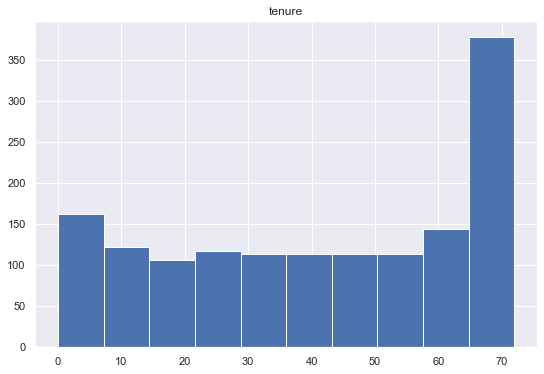

In [308]:
X.query('Partner_Yes == 1 & Dependents_Yes == 1')[['tenure']].sort_values(by='tenure').hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F54C78B08>]],
      dtype=object)

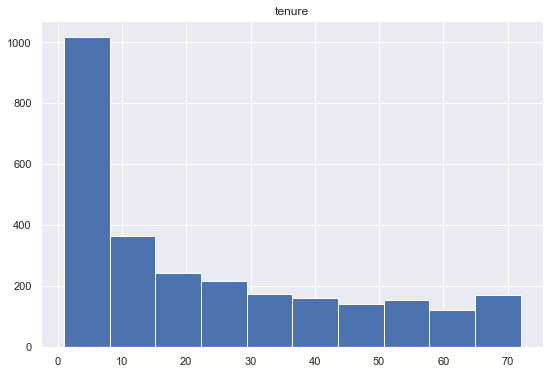

In [309]:
X.query('Partner_No == 1 & Dependents_No == 1')[['tenure']].sort_values(by='tenure').hist()

Наблюдается стабильность пользования услугами компании у пользователей, находящихся в браке и имеющих иждевенцев,
наибольшее число таких пользоваталей наблюдается после долгосрочного пользования услугами (5 лет) (см. 1 график)

Из числа пользователей не состоящих в браке и не имеющих иждивенцев наблюдается снижение заинтересованности 
в услугах компании - резкое снижение после недолгосрочного использования и постепенное после пользования услугами 
от года и более (см. 2 график).

Стоит обратить внимание на клиентов 2 категории и попытаться удержать в первые месяцы пользования услугами 
предлагая специальные предложения 



In [310]:
# Рассмоттрим зависимость типа контракта клиента и метода оплаты от общего дохода компании с клиента и длительности обслуживания

In [311]:
X_analys.groupby(['Contract', 'PaymentMethod'], as_index=False).agg({'TotalCharges': 'mean', 'tenure': 'mean'}) \
        .sort_values(by=['tenure'], ascending=False)

,Contract,PaymentMethod,TotalCharges,tenure
10,Two year,Electronic check,5349.495117,61.539474
8,Two year,Bank transfer (automatic),4182.545898,61.503226
9,Two year,Credit card (automatic),4052.912598,59.711730
6,One year,Electronic check,3868.158203,46.346801
4,One year,Bank transfer (automatic),3319.591309,45.621622
5,One year,Credit card (automatic),3358.091064,45.289017
11,Two year,Mailed check,1863.090210,43.115265
7,One year,Mailed check,1505.639282,29.306667
0,Month-to-month,Bank transfer (automatic),1883.425781,24.594118
1,Month-to-month,Credit card (automatic),1801.684326,24.017621


Наибольшую прибыль приносят клиенты с двухгодовым контрактом и методом оплаты - электронный платеж
Наименьшую с помесячным типом контрата с методом оплаты почтовой квитацией*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F55E31F48>]],
      dtype=object)

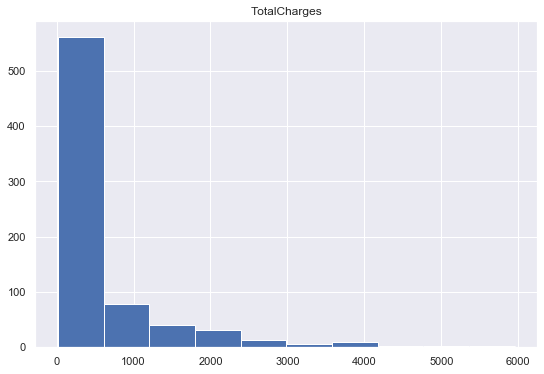

In [312]:
X_analys.query('Contract == "Month-to-month" & PaymentMethod == "Mailed check"')[['TotalCharges']].sort_values(by='TotalCharges').hist()

Наблюдается резкое снижение прибыли от клиентов вышеуказанного типа*, возможно из-за невыгодоного помесячного тарифа
и неудобным способ оплаты услуг, компании стоит предложить таким клиентам годовой или двухгодовой контракт,
подробно разъяснив выгоду для клиента и также попытаться перевести клиента в безналичный расчет - так как клиенту будет легче 
расплачиваться за услуги электронными платежами или автоматическими списаниями

In [313]:
# Проверим какие клиенты на данном промежутке принесли компании максимальный доход

In [314]:
X_analys.sort_values(by='TotalCharges').tail(20).drop(['customerID', 'Dependents'], axis = 1)

,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5607,Male,0,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),114.45,8375.049805
4116,Male,1,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),115.75,8399.150391
3513,Male,1,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,8404.900391
4407,Female,0,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),115.05,8405.000000
1306,Male,0,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.80,8424.900391
3489,Female,0,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,115.50,8425.150391
1538,Male,0,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,115.55,8425.299805
3309,Female,1,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.35,8436.250000
4956,Female,0,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.80,8456.750000
3823,Female,0,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.80,8476.500000


В данной выборке наблюдается независимость пола клиента, так как в равной степени присутствуют и мужчины, и женщины,
данные клиенты пользуются оптоволоконным соединением и срок пользования услугами больше 70 месяцев, 
возможно компании стоит предлагать клиентам переход на данный тип соединения, так как в долгосрочной перспективе мы видим, что такие клиенты остаются и приносят максимальную прибыль.

Также у всех клиентов выборки подключены услуги тех.поддержки, страховки и стриминговых сервисов, что опять же свидетельсвует 
о удовлетворенности клиентов указанными услугами, которые помогают удерживать клиентов, то есть для клиентов, которые
пользуются услугами в районе 2-3х лет, но не подключены дополнительные опции (страховка, тех.поддержка и т.д.),
стоит предлагать подключить данные услуги, чтобы гарантировать удержание на более длительное время.

Подтвеждается гипотеза что электронный и автоматический расчет наиболее удобен для клиентов и удерживает на длительный срок.

## 3. Построение моделей для прогнозирования оттока

In [315]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

In [316]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)  #Разбиение датасета на трейн и тестовый

In [317]:
#Построение моделей

# Logistic Regression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, Y_train)
lr_predictions = logreg.predict(X_test)
lr_recall = recall_score(Y_test, lr_predictions)
lr_precision = precision_score(Y_test, lr_predictions)
lr_accuracy = accuracy_score(Y_test, lr_predictions)
lr_f1_score= f1_score(Y_test, lr_predictions)
lr_roc_auc = roc_auc_score(Y_test, lr_predictions)

In [318]:
# C-Support Vector Classification

svc = SVC(random_state=42)
svc.fit(X_train, Y_train)
svc_predictions = svc.predict(X_test)
svc_recall = recall_score(Y_test, svc_predictions)
svc_precision = precision_score(Y_test, svc_predictions)
svc_accuracy = accuracy_score(Y_test, svc_predictions)
svc_f1_score= f1_score(Y_test, svc_predictions)
svc_roc_auc = roc_auc_score(Y_test, svc_predictions)

In [319]:
# K-nearest neighbors

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(X_test)
knn_recall = recall_score(Y_test, knn_predictions)
knn_precision = precision_score(Y_test, knn_predictions)
knn_accuracy = accuracy_score(Y_test, knn_predictions)
knn_f1_score= f1_score(Y_test, knn_predictions)
knn_roc_auc = roc_auc_score(Y_test, knn_predictions)

In [320]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
gauss_predictions = gaussian.predict(X_test)
gauss_recall = recall_score(Y_test, gauss_predictions)
gauss_precision = precision_score(Y_test, gauss_predictions)
gauss_accuracy = accuracy_score(Y_test, gauss_predictions)
gauss_f1_score= f1_score(Y_test, gauss_predictions)
gauss_roc_auc = roc_auc_score(Y_test, gauss_predictions)

In [321]:
# Gradient Boosting

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, Y_train)
gbc_predictions = gbc.predict(X_test)
gbc_recall = recall_score(Y_test, gbc_predictions)
gbc_precision = precision_score(Y_test, gbc_predictions)
gbc_accuracy = accuracy_score(Y_test, gbc_predictions)
gbc_f1_score = f1_score(Y_test, gbc_predictions)
gbc_roc_auc = roc_auc_score(Y_test, gbc_predictions)

In [322]:
# Random Forest

random_forest = RandomForestClassifier(random_state=42)
rfc_model = random_forest.fit(X_train, Y_train)
rfc_predictions = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
rfc_recall = recall_score(Y_test, rfc_predictions)
rfc_precision = precision_score(Y_test, rfc_predictions)
rfc_accuracy = accuracy_score(Y_test, rfc_predictions)
rfc_f1_score = f1_score(Y_test, rfc_predictions)
rfc_roc_auc = roc_auc_score(Y_test, rfc_predictions)

## 4. Сравнение качества моделей

In [323]:
#Сравним модели по основным метрикам Recall, Precision, Accuracy, F1_score, Roc-Auc (т.к. у нас несбалансированный класс зав. перем.)

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'C-Support Vector Classification', 'K-nearest neighbors', 'Gaussian Naive Bayes', 
              'Gradient Boosting', 'Random Forest'],
     
    'Recall': [lr_recall, svc_recall, knn_recall, gauss_recall, gbc_recall, rfc_recall],
    'Precision' : [lr_precision, svc_precision, knn_precision, gauss_precision, gbc_precision, rfc_precision],
    'Accuracy' : [lr_accuracy, svc_accuracy, knn_accuracy, gauss_accuracy, gbc_accuracy, rfc_accuracy],
    'F1_score': [lr_f1_score, svc_f1_score, knn_f1_score, gauss_f1_score, gbc_f1_score, rfc_f1_score],
    'Roc-Auc' : [lr_roc_auc, svc_roc_auc, knn_roc_auc, gauss_roc_auc, gbc_roc_auc, rfc_roc_auc]




})
models.sort_values(by=['Recall', 'Roc-Auc', 'F1_score'], ascending=False)




,Model,Recall,Precision,Accuracy,F1_score,Roc-Auc
3,Gaussian Naive Bayes,0.828571,0.427041,0.670007,0.563604,0.721840
0,Logistic Regression,0.537662,0.638889,0.802939,0.583921,0.716223
4,Gradient Boosting,0.527273,0.640379,0.802271,0.578348,0.712377
5,Random Forest,0.444156,0.581633,0.774883,0.503682,0.666772
2,K-nearest neighbors,0.423377,0.534426,0.756847,0.472464,0.647839
1,C-Support Vector Classification,0.254545,0.573099,0.759519,0.352518,0.594449


Для задачи прогнозирования оттока мы должны ориентироваться на Recall, т.к. нам важно охватить всех клиентов компании.

Наилучший показатель recall демонстрирует Байесовский классификатор, поэтому будем ориентироваться на эту модель.
Она же и демонстрирует наилучший показатель Roc-Auc, демонстрирующий качество классификации, т.е. произойдет отток или нет.

In [324]:
#Попробуем улучшить метрику, подобрав наилучшие параметры моделей алгоримтов на 2 и 3 месте по Recall

#Выведем лучшие параметры для экономии времени расчета (предварительно посчитаны)

# lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# skf = StratifiedKFold(n_splits=5, random_state=17)
# lr_grid = GridSearchCV(logreg, lr_params, cv=skf)
# lr_grid1 = lr_grid.fit(X_train, Y_train)
# lr_grid1.best_params_
print("{'C': 0.01}")

{'C': 0.01}


In [325]:
# lr_params = {'C': np.arange(0.01, 0.1, 0.02)}
# lr_grid = GridSearchCV(logreg, lr_params, cv=skf)
# lr_grid1 = lr_grid.fit(X_train, Y_train)
# lr_grid1.best_params_
print("{'C': 0.01}")

{'C': 0.01}


In [326]:
logreg = LogisticRegression(C=0.01, random_state=42)
logreg.fit(X_train, Y_train)
lr_predictions = logreg.predict(X_test)
lr_recall = recall_score(Y_test, lr_predictions)
lr_precision = precision_score(Y_test, lr_predictions)
lr_accuracy = accuracy_score(Y_test, lr_predictions)
lr_f1_score= f1_score(Y_test, lr_predictions)
lr_roc_auc = roc_auc_score(Y_test, lr_predictions)

In [327]:
# gbc_params = {'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# gbc_grid = GridSearchCV(gbc, gbc_params, cv= skf)
# gbc_grid1 = gbc_grid.fit(X_train, Y_train)
# gbc_grid1.best_params_
print("{'learning_rate': 0.1}")

{'learning_rate': 0.1}


In [328]:
# gbc_params = {'learning_rate': np.arange(0.05, 0.1, 0.01) }
# gbc_grid = GridSearchCV(gbc, gbc_params, cv= skf)
# gbc_grid1 = gbc_grid.fit(X_train, Y_train)
# gbc_grid1.best_params_
print("{'learning_rate': 0.060000000000000005}")

{'learning_rate': 0.060000000000000005}


In [329]:
gbc = GradientBoostingClassifier(learning_rate=0.06, random_state=42)
gbc.fit(X_train, Y_train)
gbc_predictions = gbc.predict(X_test)
gbc_recall = recall_score(Y_test, gbc_predictions)
gbc_precision = precision_score(Y_test, gbc_predictions)
gbc_accuracy = accuracy_score(Y_test, gbc_predictions)
gbc_f1_score = f1_score(Y_test, gbc_predictions)
gbc_roc_auc = roc_auc_score(Y_test, gbc_predictions)

In [330]:
fine_model = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gradient Boosting'],
     
    'Recall': [lr_recall, gbc_recall],
    'Precision' : [lr_precision, gbc_precision],
    'Accuracy' : [lr_accuracy, gbc_accuracy],
    'F1_score': [lr_f1_score, gbc_f1_score],
    'Roc-Auc' : [lr_roc_auc, gbc_roc_auc]
})


In [331]:
fine_model

,Model,Recall,Precision,Accuracy,F1_score,Roc-Auc
0,Logistic Regression,0.524675,0.647436,0.804275,0.579627,0.712877
1,Gradient Boosting,0.524675,0.651613,0.805611,0.581295,0.713777


In [332]:
models.sort_values(by=['Recall', 'Roc-Auc', 'F1_score'], ascending=False) #Изначальные метрики

,Model,Recall,Precision,Accuracy,F1_score,Roc-Auc
3,Gaussian Naive Bayes,0.828571,0.427041,0.670007,0.563604,0.721840
0,Logistic Regression,0.537662,0.638889,0.802939,0.583921,0.716223
4,Gradient Boosting,0.527273,0.640379,0.802271,0.578348,0.712377
5,Random Forest,0.444156,0.581633,0.774883,0.503682,0.666772
2,K-nearest neighbors,0.423377,0.534426,0.756847,0.472464,0.647839
1,C-Support Vector Classification,0.254545,0.573099,0.759519,0.352518,0.594449


Можем наблюдать незначительное улучшение Accuracy и незначительное снижение Recall, поэтому выбираем модель, 
построенную алгоритмом Байесовского классификатора.

In [333]:
#Так же выведем ранжирование важности фичей на основе Random Forest классификатора

In [334]:
pd.DataFrame(rfc_model.feature_importances_, index=X_train.columns, columns=['Importance']) \
    .sort_values('Importance', ascending=False) #

,Importance
TotalCharges,0.167210
MonthlyCharges,0.135647
tenure,0.127819
c_type_Month-to-month,0.070613
PaymentMethod,0.054310
TechSupport_No,0.039477
OnSecurity_No,0.030130
EService_Fiber optic,0.028245
SeniorCitizen,0.019704
gend_Male,0.019206


## Общие выводы работы:

На основе проведенного анализа и сформулированных гипотез, нам удалось выявить зависимости и сформировать рекомендации
для компании, которые помогут удержать относительно новых клиентов (несколько месяцев пользования услугами компании) и 
клиентов, которые используют услуги несколько лет.

Также, мы попробовали построить несколько моделей машинного обучения, основываясь на базовых алгоритмах ML, 
сравнив полученные модели и их метрики (упор на Recall), мы выяснили, что модель, построенная на основе Байесовского классификатора, демонстрирует наилучший прогноз оттока клиентов, рекомендуется использовать именно ее.
